### Import Libraries

In [1]:
import pandas as pd

### Load the dataset

In [2]:
df = pd.read_csv('./datasets/household_power_consumption.txt', delimiter=';', low_memory=False)

### Grab time series of electricity usage

In [3]:
df['date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['electricity_usage'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df = df[['date_time', 'electricity_usage']].copy()

/var/tmp/ipykernel_40741/1437528521.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


### Set the index as and sort by date and time

In [4]:
df = df.set_index('date_time').sort_index()

### Resample to hourly frequency

In [5]:
df_hour = df.resample('1H').mean()

### Create shifted time series

In [6]:
df_hour['electricity_usage'] = df_hour['electricity_usage'].fillna(method='ffill')
df_hour['electricity_usage_1hr_lag'] = df_hour['electricity_usage'].shift()
df_hour['electricity_usage_2hr_lag'] = df_hour['electricity_usage'].shift(2)
df_hour['electricity_usage_3hr_lag'] = df_hour['electricity_usage'].shift(3)
df_hour['electricity_usage_4hr_lag'] = df_hour['electricity_usage'].shift(4)
df_hour['electricity_usage_5hr_lag'] = df_hour['electricity_usage'].shift(5)
df_hour['electricity_usage_6hr_lag'] = df_hour['electricity_usage'].shift(6)
df_hour['electricity_usage_7hr_lag'] = df_hour['electricity_usage'].shift(7)
df_hour['electricity_usage_8hr_lag'] = df_hour['electricity_usage'].shift(8)

### Create month/seasonality as a feature

In [7]:
df_hour['month'] = df_hour.index.month

### Drop missing data

In [8]:
df_hour = df_hour.dropna()

### Split train test sets

In [9]:
sample_size = df_hour.shape[0] - 200
df_train = df_hour.iloc[:sample_size].copy()
df_test = df_hour.iloc[sample_size:].copy()

<hr>

In [10]:
df_train.head()

,electricity_usage,electricity_usage_1hr_lag,electricity_usage_2hr_lag,electricity_usage_3hr_lag,electricity_usage_4hr_lag,electricity_usage_5hr_lag,electricity_usage_6hr_lag,electricity_usage_7hr_lag,electricity_usage_8hr_lag,month
date_time,,,,,,,,,,
2006-12-17 01:00:00,3.349400,1.882467,2.061600,2.200133,3.056467,3.268567,3.400233,3.632200,4.222889,12
2006-12-17 02:00:00,1.587267,3.349400,1.882467,2.061600,2.200133,3.056467,3.268567,3.400233,3.632200,12
2006-12-17 03:00:00,1.662200,1.587267,3.349400,1.882467,2.061600,2.200133,3.056467,3.268567,3.400233,12
2006-12-17 04:00:00,2.215767,1.662200,1.587267,3.349400,1.882467,2.061600,2.200133,3.056467,3.268567,12
2006-12-17 05:00:00,1.996733,2.215767,1.662200,1.587267,3.349400,1.882467,2.061600,2.200133,3.056467,12


### Install TPot

In [15]:
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 20.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 42.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 52.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 5.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 7.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 5.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [17]:
!install numpy scipy scikit-learn pandas joblib pytorch

install: target 'pytorch' is not a directory


In [18]:
!pip install deap update_checker tqdm stopit xgboost

In [12]:
!pip install tpot

In [22]:
from tpot import TPOTRegressor

tpot_automl = TPOTRegressor(generations=10, population_size=10, 
                            verbosity=2, scoring='neg_mean_squared_error',   
                            max_time_mins=5, random_state = 666)

### Seperate Features and Target

In [23]:
X_train = df_train.drop(columns='electricity_usage')
y_train = df_train['electricity_usage']

### Finding the Optimal Pipeline

In [25]:
tpot_automl.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.35764906801916696

Generation 2 - Current best internal CV score: -0.35649523897356544

5.19 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.9000000000000001, min_samples_leaf=17, min_samples_split=6, n_estimators=100)


TPOTRegressor(generations=10, max_time_mins=5, population_size=10,
              random_state=666, scoring='neg_mean_squared_error', verbosity=2)

### Export Optimised Pipeline as python code

In [26]:
tpot_automl.export('tpot_best_model.py')

### Evaluate model with test set

In [28]:
X_test = df_test.drop(columns='electricity_usage')
y_test = df_test['electricity_usage']

tpot_automl.score(X_test, y_test)

-0.354918058969391

### Use SKLearn to find MSE

In [29]:
from sklearn.metrics import mean_squared_error

y_pred = tpot_automl.predict(X_test)
mean_squared_error(y_test, y_pred)

0.354918058969391

### Predicted v/s Actual data

<Axes: xlabel='date_time'>

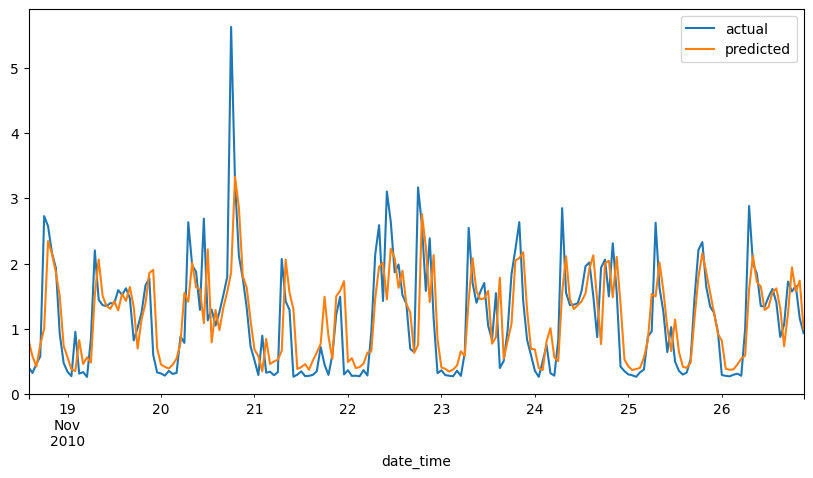

In [30]:
tpot_compare = pd.DataFrame(data={'actual': df_test['electricity_usage'], 'predicted': y_pred})
tpot_compare.plot(figsize=(10, 5))

<hr>